In [1]:
from qTools import Qubit, sigmax, sigmay, sigmaz, fidelityKet, expectationKet, compositeOp

import matplotlib.pyplot as plt

In [2]:
qubit = Qubit(frequency=1)
qubit.initialState = 1

In [3]:
sx = sigmax()
sy = sigmay()
sz = sigmaz()

def compute(sim, state):
    # Fidelity to intial
    sim.results['fidelity'].append(fidelityKet(state, sim.initialState))

    # Bloch Sphere coordinates
    sim.results['x'].append(expectationKet(sx, state))
    sim.results['y'].append(expectationKet(sy, state))
    sim.results['z'].append(expectationKet(sz, state))

qubit.simulation.compute = compute

In [4]:
qubit.simulation.totalTime = 4
qubit.simulation.stepSize = 0.01
qubit.simulation.delStates = True

In [5]:
qubit.simulation.run()

'_Simulation1Results'

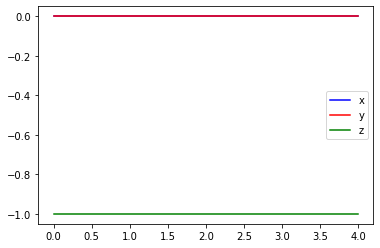

In [6]:
def plot(sys=qubit, index = None, lineCS = ['b', 'r', 'g']):
    if index is None:
        x = sys.simulation.qRes.results['x']
        y = sys.simulation.qRes.results['y']
        z = sys.simulation.qRes.results['z']
    elif isinstance(index, int):
        x = sys.simulation.qRes.results['x'][index]
        y = sys.simulation.qRes.results['y'][index]
        z = sys.simulation.qRes.results['z'][index]

    t = qubit.simulation.timeList

    plt.plot(t, x, lineCS[0])
    plt.plot(t, y, lineCS[1])
    plt.plot(t, z, lineCS[2])
    plt.legend(['x', 'y', 'z'])

plot()

In [7]:
twoQubit = qubit + qubit

In [8]:
secondQubit = twoQubit.getObjByName('Qubit2')

secondQubit.initialState = 0

In [9]:
def sxCoupling(compSys, qub1, qub2):
    coupling = compSys.createSysCoupling([qub1, qub2], [sigmax, sigmax], couplingStrength=1)
    return coupling

coupleQubits = sxCoupling(twoQubit, qubit, secondQubit)

In [10]:
twoQubit.simulation.totalTime = 4
twoQubit.simulation.stepSize = 0.01
twoQubit.simulation.delStates = True

In [12]:
twoQubit.aux['sx'] = compositeOp(sigmax(), dimA=2)
twoQubit.aux['sy'] = compositeOp(sigmay(), dimA=2)
twoQubit.aux['sz'] = compositeOp(sigmaz(), dimA=2)

def compute(sim, state):
    # Fidelity to intial
    sim.results['fidelity'].append(fidelityKet(state, sim.initialState))

    # Bloch Sphere coordinates
    sim.results['x'].append(expectationKet(sim.aux['sx'], state))
    sim.results['y'].append(expectationKet(sim.aux['sy'], state))
    sim.results['z'].append(expectationKet(sim.aux['sz'], state))

twoQubit.simulation.compute = compute

In [13]:
twoQubit.simulation.run()

'_Simulation3Results'

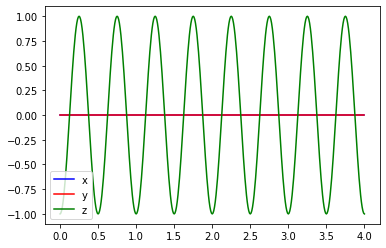

In [14]:
plot(twoQubit)

In [15]:
fourQubit = twoQubit + twoQubit.copy(name='bob')

In [16]:
fourQubit.aux['sx'] = compositeOp(sigmax(), dimA=4, dimB=2)
fourQubit.aux['sy'] = compositeOp(sigmay(), dimA=4, dimB=2)
fourQubit.aux['sz'] = compositeOp(sigmaz(), dimA=4, dimB=2)

fourQubit.simulation.compute = compute

In [17]:
fourQubit.simulation.totalTime = 4
fourQubit.simulation.stepSize = 0.01
fourQubit.simulation.delStates = True

fourQubit.simulation.run()

'_Simulation13Results'

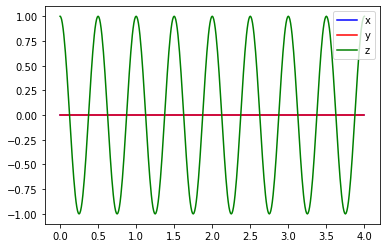

In [18]:
plot(fourQubit)

In [19]:
coupleQubits34 = sxCoupling(fourQubit.subSys['bob'], fourQubit.subSys['QuantumSystem1'].subSys['Qubit1'], fourQubit.subSys['bob'].subSys['Qubit4'])
coupleQubits34.couplingStrength = 1

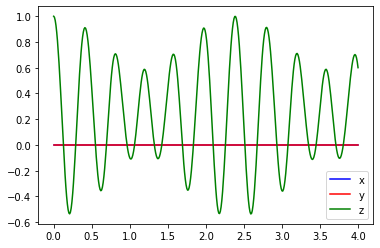

In [20]:
fourQubit.simulation.run()
plot(fourQubit)

In [21]:
fourQubit - 'Qubit4'
#fourQubit.initialState = [[1,0],[1]]

['Qubit1', 'Qubit4']  is removed from subSys of qCoupling2
'Qubit4'  is removed from subSys of bob


'QuantumSystem3'

In [23]:
fourQubit.aux['sx'] = compositeOp(sigmax(), dimA=2, dimB=2)
fourQubit.aux['sy'] = compositeOp(sigmay(), dimA=2, dimB=2)
fourQubit.aux['sz'] = compositeOp(sigmaz(), dimA=2, dimB=2)
fourQubit.simulation.compute = compute

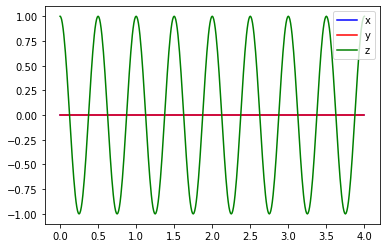

In [24]:
fourQubit.simulation.run()
plot(fourQubit)

In [25]:
twoQubit - 'Qubit1'

['Qubit1', 'Qubit2']  is removed from subSys of qCoupling1
'Qubit1'  is removed from subSys of QuantumSystem1


'QuantumSystem1'

In [26]:
fourQubit.aux['sx'] = compositeOp(sigmax(), dimB=2)
fourQubit.aux['sy'] = compositeOp(sigmay(), dimB=2)
fourQubit.aux['sz'] = compositeOp(sigmaz(), dimB=2)
fourQubit.simulation.compute = compute

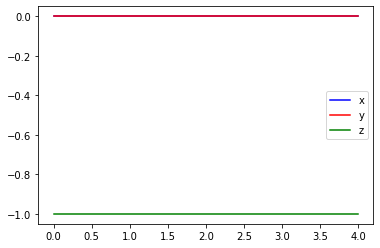

In [27]:
fourQubit.simulation.run()
plot(fourQubit)